In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv'
data = pd.read_csv(url)

In [3]:
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


##### Here Unnamed: 0 column is serial number we can delete that column.
##### TV, Radio, and Newspaper are columns which has advertising investment detail. This are our features.
##### Sales column contain total sales data for company which is our label. the data is in continuous  form.
##### This is a linear regression problem.

### Exploratory Data Analysis (EDA) 

In [4]:
### Checking size of dataset 
data.shape

(200, 5)

##### Our dataset contains 200 rows and 5 columns.

In [5]:
### Checking for null values
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

##### There is no null value in our dataset.

In [6]:
### See the dtype for each columns
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

##### All the datasets are in float.

In [7]:
### Let's look data description.
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


##### As we seen the first column 'Unnamed:0' contains counting of data points hence we can remove this column.
##### the Count for each data point in each column is equal means there is no data lose in any column.
##### The difference between mean and std for each column is fine.
##### Difference between min value, max value,and Quartiles are seems fine for all the columns. only for news paper the difference between Q3 and max is more will check with that.

In [8]:
### Removing Unnamed:0 column.
data.drop(['Unnamed: 0'],axis=1,inplace=True)

# 

### Univariate Analysis.

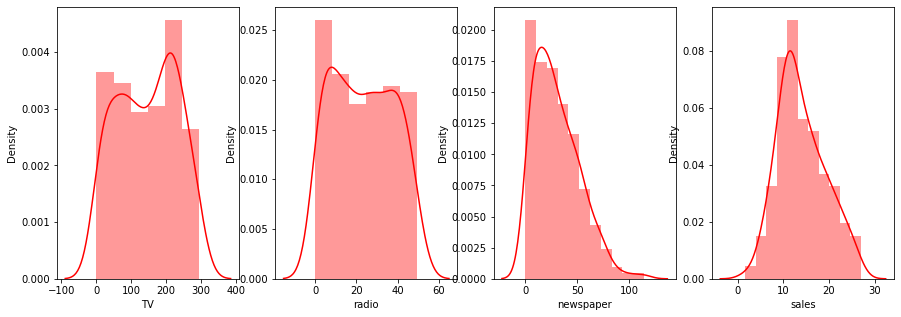

In [9]:
### Checking data distribution for each column.
plt.figure(figsize=(15,5),facecolor='white')
count = 1
for column in data:
    if count <=4:
        ax = plt.subplot(1,4,count)
        sns.distplot(data[column],color='r',)
    count+=1
plt.show()
    

##### Seems like data is distributed normally.
##### there is slight right skewness in newspaper data.

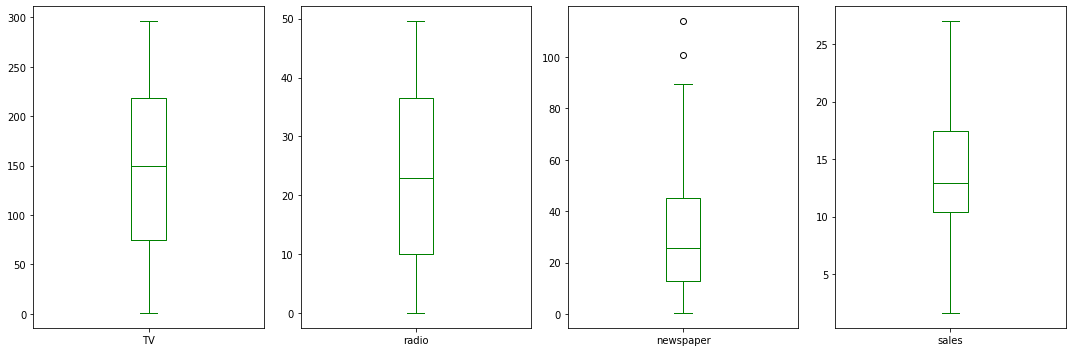

In [10]:
### Checking outlier in each column.
plt.figure(figsize=(15,5),facecolor='white')
count = 1
for column in data:
    if count <=4:
        ax = plt.subplot(1,4,count)
        data[column].plot(kind= 'box', color = 'g')
    count+=1
plt.tight_layout()

##### We can see only 2 outlier in News paper column.

### Biveriate Analysis

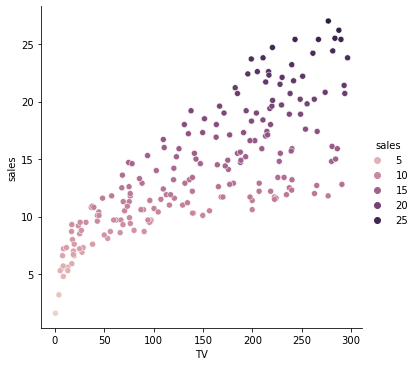

In [11]:
### checking relationship between TV and sales by ploting Rel plot.
sns.relplot(x= 'TV',y='sales',data=data, hue = 'sales')

##### There is strong relationship between TV investment and Sales. As we increases investment in tv our sales also increases.

<AxesSubplot:xlabel='radio', ylabel='sales'>

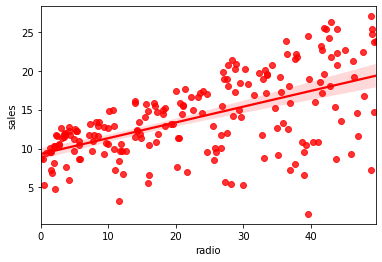

In [12]:
### Let's plot regplot between sales and radio investment.
sns.regplot(x = 'radio',y = 'sales',data=data, color='red')

##### The radio investment is also showing some linear relationship with sales but the data points are far away from best fit line if we increases investment in radio.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

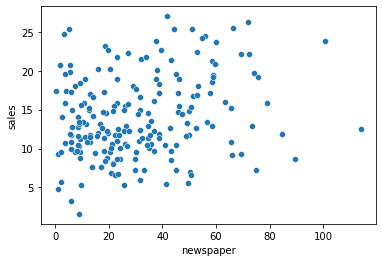

In [13]:
### Ploting scatter plot between sales and newspaper.
sns.scatterplot(x= 'newspaper',y='sales',data=data )

##### Investment in news paper does not show any relationship with sales.

### Univeriate Analysis

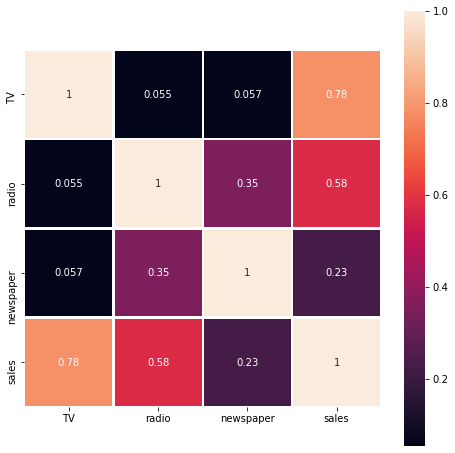

In [14]:
### Let's check correlationship between all the variables and label vs variables.
data_corr = data.corr().abs()
plt.figure(figsize=(8,8))
sns.heatmap(data_corr,linewidths=1.5,annot=True, square=True)
plt.show()

##### As showen in above heatmap, TV and radio shows  78% and 58% relationship with Sales.
##### newspaper shows 23% relationship with Sales.
##### No correlation found between variables.

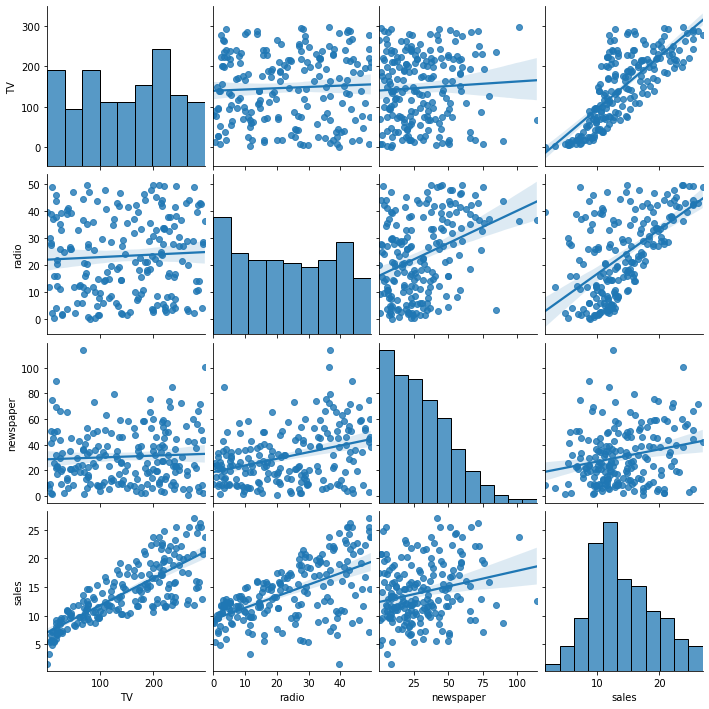

In [15]:
### Pairplot for all the datasets.
sns.pairplot(data,kind = 'reg')

##### We can see TV and Newspaper shows relationships with Sales.

### Preprocessing

In [16]:
### Removing outliers 
from scipy.stats import zscore
z = np.abs(zscore(data))
df =data[(z<3).all(axis =1)]

In [17]:
print('Size of data before zscore :',data.shape,'\nSize of data after applying zscore :',df.shape)

Size of data before zscore : (200, 4) 
Size of data after applying zscore : (198, 4)


In [18]:
### checking data loss after zscore.
((200 - 198)/200)*100

1.0

##### After removing outlier we lost only 1% data is fine.

In [19]:
### separating features and label in x and y.
x = df.drop('sales',axis=1)
y = df['sales']

### Scaling / Standardization

In [20]:
### scaling our x data using Standardscaler.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

##### Now we will use x_Scaled data for further steps.

### Train - test split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=43)

In [22]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(148, 3) (148,) (50, 3) (50,)


### Importing Regression models

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [24]:
lr = LinearRegression() ### Instantiating Linear regression.
lr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_lr_pred =lr.predict(x_test) ### Predicting x_test using Linear regression model.

In [25]:
dtr = DecisionTreeRegressor() ### Instantiating DecisionTree Regressor 
dtr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_dtr_pred = dtr.predict(x_test) ### Predicting x_test using DecisionTree model.

In [26]:
knn = KNeighborsRegressor() ### Instantiating KNeighbors Regressor
knn.fit(x_train,y_train) ### Training our model with x_train and y_train
y_knn_pred = knn.predict(x_test) ### Predicting x_test using Kneighbors model.

In [27]:
svr = SVR()             ### Instantiating SVR
svr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_svr_pred = svr.predict(x_test) ### Predicting x_test using SVM model.

In [59]:
rfr = RandomForestRegressor() ### Instantiating RandomForest Regressor
rfr.fit(x_train,y_train)     ### Training our model with x_train and y_train
y_rfr_pred = rfr.predict(x_test) ### Predicting x_test using Random Forest  model.

### Evaluation Metrics and R2score for each model

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R2 score for Linear regression:- ',r2_score(y_test,y_lr_pred))
print('R2 score for Decision Tree:- ',r2_score(y_test,y_dtr_pred))
print('R2 score for KNeighbors:- ',r2_score(y_test,y_knn_pred))
print('R2 score for SVR:- ',r2_score(y_test,y_svr_pred))
print('R2 score for Random Forest:- ',r2_score(y_test,y_rfr_pred))

R2 score for Linear regression:-  0.8734797346070338
R2 score for Decision Tree:-  0.9676149148183864
R2 score for KNeighbors:-  0.9235395906996678
R2 score for SVR:-  0.9003602321551644
R2 score for Random Forest:-  0.9764530637254902


##### From above 5 models Random forest Regressor is giving 97% R2_score.

In [42]:
### Checking MSE error.

print('MSE for Linear regression:- ',mean_squared_error(y_test,y_lr_pred))
print('MSE for Decision Tree:- ',mean_squared_error(y_test,y_dtr_pred))
print('MSE for KNeighbors:- ',mean_squared_error(y_test,y_knn_pred))
print('MSE for SVR:- ',mean_squared_error(y_test,y_svr_pred))
print('MSE for Random Forest:- ',mean_squared_error(y_test,y_rfr_pred))

MSE for Linear regression:-  3.778603638120174
MSE for Decision Tree:-  0.9672000000000002
MSE for KNeighbors:-  2.2835360000000007
MSE for SVR:-  2.975801450546723
MSE for Random Forest:-  0.7064391799999971


##### Out of 5 models Random forest is making least mean square error therefore our best model is Random forest model.

### performing Hyper Parameter tuning.

In [43]:
from sklearn.model_selection import GridSearchCV ### Importing GridSearchCV for parameter tuning.

In [46]:
params = {'n_estimators': np.arange(100,150,10),
               'max_features': ['auto','sqrt','log'],
               'max_depth': np.arange(2,10,2),
               'min_samples_split': np.arange(2,10,2),
               'min_samples_leaf': np.arange(5,20,5)}

In [48]:
grid_search = GridSearchCV(estimator=rfr,param_grid= params,cv=5,n_jobs= -1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'max_features': ['auto', 'sqrt', 'log'],
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 110, 120, 130, 140])})

In [49]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
 rfr_2 = RandomForestRegressor(n_estimators=100,max_depth=8,max_features='auto',min_samples_leaf=5,min_samples_split=2) ### Instantiating our model with best parameter.

In [56]:
rfr_2.fit(x_train,y_train) ### Training data

RandomForestRegressor(max_depth=8, min_samples_leaf=5)

In [57]:
y_pred = rfr_2.predict(x_test)

In [58]:
r2_score(y_test,y_pred)

0.9593407893820424

##### The R2 Score for Random forest model after hyper parameter tuning is 95% which is less then our defualt model score 97%.
##### Thus we can go with default model.

### Saving our model

In [61]:
import pickle
Advertising = 'advertising.pickle'
pickle.dump(rfr,open(Advertising,'wb'))

In [62]:
load_model = pickle.load(open(Advertising,'rb'))

In [64]:
y_predict = load_model.predict(x_test)

In [65]:
r2_score(y_test,y_predict)

0.9764530637254902